## Analyse de la consommation énergétique en gaz et électricité en France en 2021 ##

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(("C:/Users/alexi/Downloads/conso-elec-gaz-annuelle-par-naf-agregee-region.csv"), sep=';', decimal=',')

In [3]:
data.head()

,operateur,annee,filiere,code_categorie_consommation,libelle_categorie_consommation,code_grand_secteur,libelle_grand_secteur,code_naf,libelle_secteur_naf2,conso,pdl,indqual,nombre_mailles_secretisees,code_region,libelle_region
0,Régie intercommunale d'électricité de Niederbr...,2021,Electricité,PRO,Petits professionels,A,Agriculture,NaN,0,115.362,9,0.491,0,44,Grand Est
1,Régie Municipale Bazas-Energies,2021,Electricité,RES,Résidentiel,R,Résidentiel,NaN,0,12471.471,2634,0.00721,0,75,Nouvelle-Aquitaine
2,Régie municipale d'électricité d'Arignac,2021,Electricité,ENT,Entreprises,T,Tertiaire,94.0,Activités des organisations associatives,493.0,1,1.0,0,76,Occitanie
3,Régie municipale d'électricité d'Arignac,2021,Electricité,PRO,Petits professionels,I,Industrie,NaN,0,0.0,0,0.0,1,76,Occitanie
4,Régie municipale d'électricité d'Arignac,2021,Electricité,PRO,Petits professionels,T,Tertiaire,NaN,0,385.0,52,1.0,0,76,Occitanie


In [4]:
data.isnull().sum()

operateur                            0
annee                                0
filiere                              0
code_categorie_consommation          0
libelle_categorie_consommation       0
code_grand_secteur                   0
libelle_grand_secteur                0
code_naf                          6985
libelle_secteur_naf2                 0
conso                                0
pdl                                  0
indqual                              0
nombre_mailles_secretisees           0
code_region                          0
libelle_region                       0
dtype: int64

In [5]:
print(data['annee'].dtypes)

int64


In [6]:
data_2021 = data[data['annee'] == 2021]

In [7]:
data_2021 = data_2021.copy()

In [8]:
data_2021.loc[:, 'conso'] = np.round(data_2021['conso'].astype(float)).astype(int)

In [9]:
data_2021

,operateur,annee,filiere,code_categorie_consommation,libelle_categorie_consommation,code_grand_secteur,libelle_grand_secteur,code_naf,libelle_secteur_naf2,conso,pdl,indqual,nombre_mailles_secretisees,code_region,libelle_region
0,Régie intercommunale d'électricité de Niederbr...,2021,Electricité,PRO,Petits professionels,A,Agriculture,NaN,0,115,9,0.491,0,44,Grand Est
1,Régie Municipale Bazas-Energies,2021,Electricité,RES,Résidentiel,R,Résidentiel,NaN,0,12471,2634,0.00721,0,75,Nouvelle-Aquitaine
2,Régie municipale d'électricité d'Arignac,2021,Electricité,ENT,Entreprises,T,Tertiaire,94.0,Activités des organisations associatives,493,1,1.0,0,76,Occitanie
3,Régie municipale d'électricité d'Arignac,2021,Electricité,PRO,Petits professionels,I,Industrie,NaN,0,0,0,0.0,1,76,Occitanie
4,Régie municipale d'électricité d'Arignac,2021,Electricité,PRO,Petits professionels,T,Tertiaire,NaN,0,385,52,1.0,0,76,Occitanie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16847,Vialis,2021,Gaz,ENT,Entreprises,X,Secteur Inconnu,NaN,0,140333,110,0.797,0,44,Grand Est
16848,Vialis,2021,Gaz,PRO,Petits professionels,A,Agriculture,NaN,0,686,18,0.268,0,44,Grand Est
16849,Vialis,2021,Gaz,PRO,Petits professionels,I,Industrie,NaN,0,7316,122,0.404,0,44,Grand Est
16850,Vialis,2021,Gaz,PRO,Petits professionels,X,Secteur Inconnu,NaN,0,8640,222,0.273,0,44,Grand Est


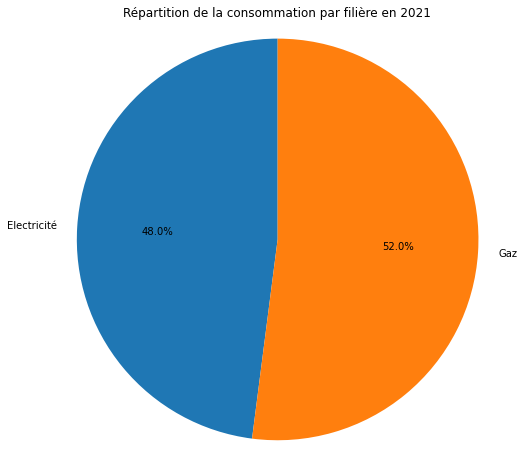

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df_sum = data_2021.groupby('filiere')['conso'].sum()

df_part = pd.DataFrame({'Filiere': df_sum.index, 'Consommation': df_sum.values})

df_part['Part'] = df_part['Consommation'] / df_part['Consommation'].sum()

plt.figure(figsize=(8, 8))
plt.pie(df_part['Part'], labels=df_part['Filiere'], autopct='%1.1f%%', startangle=90)
plt.title('Répartition de la consommation par filière en 2021')
plt.axis('equal')
plt.show()

In [11]:
df_consumption = data_2021.groupby(['libelle_categorie_consommation', 'libelle_grand_secteur'])['conso'].sum().reset_index()

df_ranked = df_consumption.sort_values('conso', ascending=False)

print(df_ranked[['libelle_categorie_consommation', 'libelle_grand_secteur', 'conso']])


   libelle_categorie_consommation libelle_grand_secteur      conso
5                     Entreprises             Industrie  351732929
12                    Résidentiel           Résidentiel  306277857
7                     Entreprises             Tertiaire  169124472
11           Petits professionels             Tertiaire   57961029
9            Petits professionels             Industrie    8058217
4                     Entreprises           Agriculture    5998566
8            Petits professionels           Agriculture    4054199
6                     Entreprises       Secteur Inconnu    2221990
10           Petits professionels       Secteur Inconnu    1775073
3                               0             Tertiaire     820714
2                               0       Secteur Inconnu     708881
1                               0             Industrie     522238
0                               0           Agriculture       3192


C:\Users\alexi\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


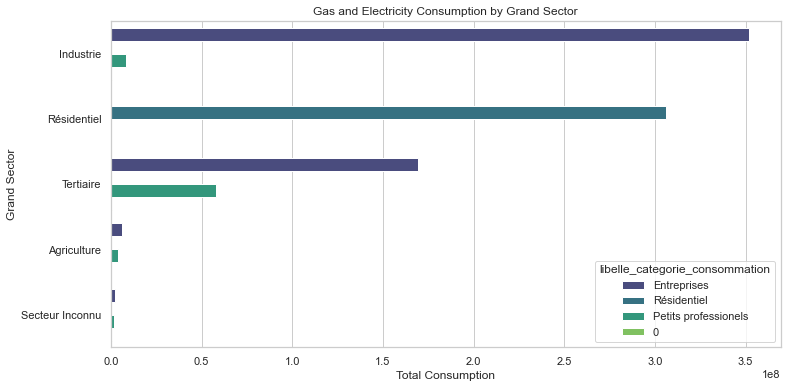

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

df_consumption = data_2021.groupby(['libelle_categorie_consommation', 'libelle_grand_secteur'])['conso'].sum().reset_index()

df_ranked = df_consumption.sort_values('conso', ascending=False)

df_ranked['Part'] = df_ranked['conso'] / df_ranked['conso'].sum()

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x='conso', y='libelle_grand_secteur', data=df_ranked, hue='libelle_categorie_consommation', palette='viridis')

plt.xlabel('Total Consumption')
plt.ylabel('Grand Sector')
plt.title('Gas and Electricity Consumption by Grand Sector')

plt.show()


In [13]:
import pandas as pd

df_consumption = data_2021.groupby(['libelle_grand_secteur', 'code_naf'])['conso'].sum().reset_index()

df_ranked = df_consumption.sort_values('conso', ascending=False)

print(df_ranked)


   libelle_grand_secteur  code_naf     conso
31             Industrie      35.0  88722004
18             Industrie      20.0  57924546
8              Industrie      10.0  44757250
22             Industrie      24.0  33538585
21             Industrie      23.0  29192357
..                   ...       ...       ...
66             Tertiaire      75.0     17708
7              Industrie       9.0      9534
85             Tertiaire      97.0      9037
5              Industrie       7.0      1292
3              Industrie       5.0      1140

[88 rows x 3 columns]


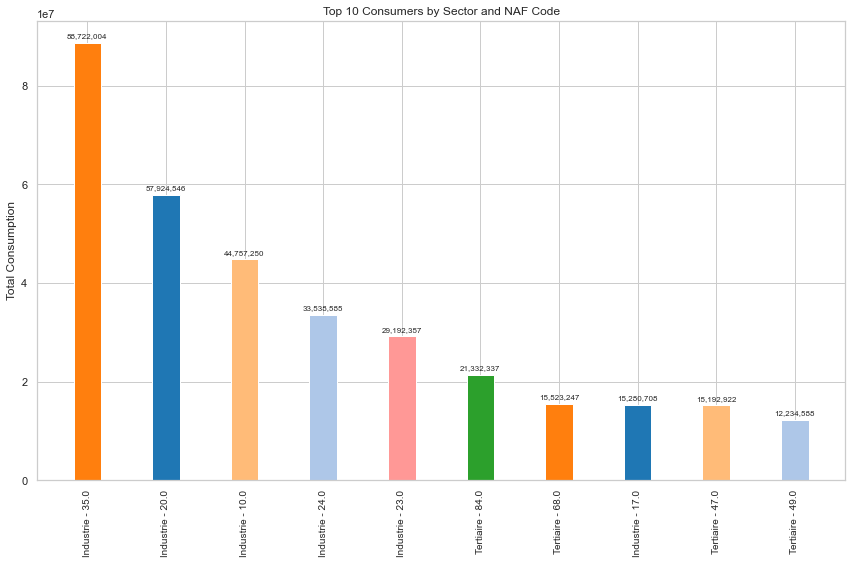

In [14]:
import matplotlib.pyplot as plt

df_top_10 = df_ranked.head(10)

fig, ax = plt.subplots(figsize=(12, 8))

bar_colors = ['#FF7F0E', '#1F77B4', '#FFBB78', '#AEC7E8', '#FF9896', '#2CA02C']
bar_width = 0.35
bar_positions = range(len(df_top_10))

bars = ax.bar(bar_positions, df_top_10['conso'], width=bar_width, color=bar_colors)

ax.set_xticks(bar_positions)
ax.set_xticklabels(df_top_10['libelle_grand_secteur'] + ' - ' + df_top_10['code_naf'].astype(str), rotation=90, fontsize=10)

ax.set_ylabel('Total Consumption')

ax.set_title('Top 10 Consumers by Sector and NAF Code')

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:,.0f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


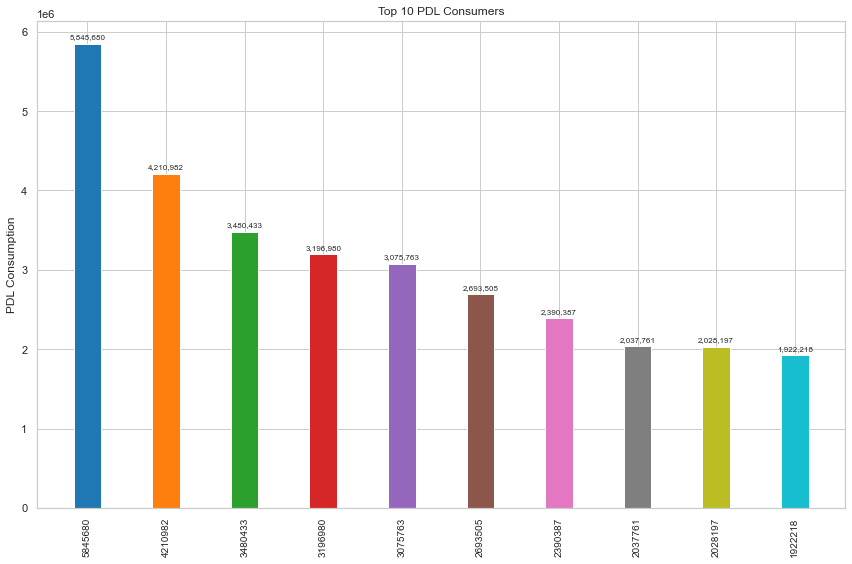

In [15]:
import matplotlib.pyplot as plt

df_pdl_sorted = data_2021.sort_values('pdl', ascending=False)

df_top_pdl = df_pdl_sorted.head(10)

fig, ax = plt.subplots(figsize=(12, 8))

bar_colors = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22', '#17BECF']
bar_width = 0.35
bar_positions = range(len(df_top_pdl))

bars = ax.bar(bar_positions, df_top_pdl['pdl'], width=bar_width, color=bar_colors)

ax.set_xticks(bar_positions)
ax.set_xticklabels(df_top_pdl['pdl'], rotation=90, fontsize=10)

ax.set_ylabel('PDL Consumption')

ax.set_title('Top 10 PDL Consumers')

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:,.0f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


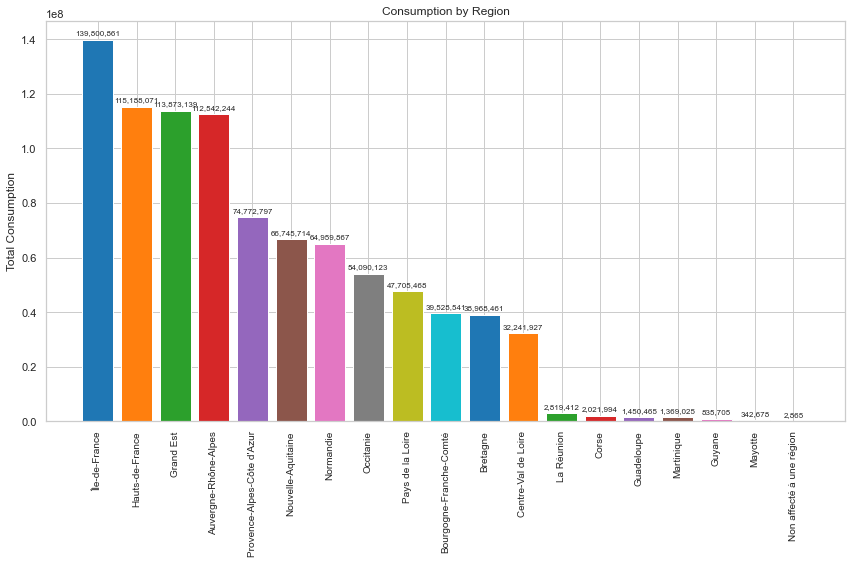

In [16]:
import matplotlib.pyplot as plt

df_region_consumption = data_2021.groupby('libelle_region')['conso'].sum().reset_index()

df_region_ranked = df_region_consumption.sort_values('conso', ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))

bar_colors = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22', '#17BECF']
bar_positions = range(len(df_region_ranked))

bars = ax.bar(bar_positions, df_region_ranked['conso'], color=bar_colors)

ax.set_xticks(bar_positions)
ax.set_xticklabels(df_region_ranked['libelle_region'], rotation=90, fontsize=10)

ax.set_ylabel('Total Consumption')

ax.set_title('Consumption by Region')

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:,.0f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [17]:
regions = data_2021['libelle_region'].unique()
print(regions)


['Grand Est' 'Nouvelle-Aquitaine' 'Occitanie' 'Hauts-de-France'
 'Bourgogne-Franche-Comté' 'Auvergne-Rhône-Alpes' 'Île-de-France'
 'Centre-Val de Loire' 'Normandie' 'Pays de la Loire' 'Bretagne'
 "Provence-Alpes-Côte d'Azur" 'Guadeloupe' 'Martinique' 'Guyane'
 'La Réunion' 'Corse' 'Mayotte' 'Non affecté à une région']


In [18]:
region_areas = {
    'Grand Est': 25161,
    'Nouvelle-Aquitaine': 84017,
    'Occitanie': 72402,
    'Hauts-de-France': 31809,
    'Bourgogne-Franche-Comté': 47462,
    'Auvergne-Rhône-Alpes': 69713,
    'Île-de-France': 12011,
    'Centre-Val de Loire': 39150,
    'Normandie': 29364,
    'Pays de la Loire': 32082,
    'Bretagne': 27208,
    'Provence-Alpes-Côte d\'Azur': 31400,
    'Guadeloupe': 1628,
    'Martinique': 1128,
    'Guyane': 83534,
    'La Réunion': 2512,
    'Corse': 8722,
    'Mayotte': 376,
}

region_areas = {region: int(area) for region, area in region_areas.items()}

data_2021['region_area'] = data_2021['libelle_region'].map(region_areas)

In [19]:
data_2021

,operateur,annee,filiere,code_categorie_consommation,libelle_categorie_consommation,code_grand_secteur,libelle_grand_secteur,code_naf,libelle_secteur_naf2,conso,pdl,indqual,nombre_mailles_secretisees,code_region,libelle_region,region_area
0,Régie intercommunale d'électricité de Niederbr...,2021,Electricité,PRO,Petits professionels,A,Agriculture,NaN,0,115,9,0.491,0,44,Grand Est,25161.0
1,Régie Municipale Bazas-Energies,2021,Electricité,RES,Résidentiel,R,Résidentiel,NaN,0,12471,2634,0.00721,0,75,Nouvelle-Aquitaine,84017.0
2,Régie municipale d'électricité d'Arignac,2021,Electricité,ENT,Entreprises,T,Tertiaire,94.0,Activités des organisations associatives,493,1,1.0,0,76,Occitanie,72402.0
3,Régie municipale d'électricité d'Arignac,2021,Electricité,PRO,Petits professionels,I,Industrie,NaN,0,0,0,0.0,1,76,Occitanie,72402.0
4,Régie municipale d'électricité d'Arignac,2021,Electricité,PRO,Petits professionels,T,Tertiaire,NaN,0,385,52,1.0,0,76,Occitanie,72402.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16847,Vialis,2021,Gaz,ENT,Entreprises,X,Secteur Inconnu,NaN,0,140333,110,0.797,0,44,Grand Est,25161.0
16848,Vialis,2021,Gaz,PRO,Petits professionels,A,Agriculture,NaN,0,686,18,0.268,0,44,Grand Est,25161.0
16849,Vialis,2021,Gaz,PRO,Petits professionels,I,Industrie,NaN,0,7316,122,0.404,0,44,Grand Est,25161.0
16850,Vialis,2021,Gaz,PRO,Petits professionels,X,Secteur Inconnu,NaN,0,8640,222,0.273,0,44,Grand Est,25161.0


In [20]:
df_region_consumption = data_2021.groupby(['libelle_region'])['conso'].sum().reset_index()

df_region_consumption = df_region_consumption.merge(data_2021[['libelle_region', 'region_area']].drop_duplicates(), on='libelle_region')

df_region_consumption['consumption_per_area'] = df_region_consumption['conso'] / df_region_consumption['region_area']

df_ranked_regions = df_region_consumption.sort_values('consumption_per_area', ascending=False)

df_ranked_regions.reset_index(drop=True, inplace=True)

print(df_ranked_regions[['libelle_region', 'conso', 'region_area', 'consumption_per_area']])

                libelle_region      conso  region_area  consumption_per_area
0                Île-de-France  139800861      12011.0          11639.402298
1                    Grand Est  113873139      25161.0           4525.779540
2              Hauts-de-France  115188071      31809.0           3621.241504
3   Provence-Alpes-Côte d'Azur   74772797      31400.0           2381.299268
4                    Normandie   64959867      29364.0           2212.228136
5         Auvergne-Rhône-Alpes  112542244      69713.0           1614.365240
6             Pays de la Loire   47705468      32082.0           1486.985475
7                     Bretagne   38968461      27208.0           1432.242759
8                   Martinique    1369025       1128.0           1213.674645
9                   La Réunion    2819412       2512.0           1122.377389
10                     Mayotte     342678        376.0            911.377660
11                  Guadeloupe    1450465       1628.0            890.949017

In [21]:
pip install geopandas

  Using cached geopandas-0.13.0-py3-none-any.whl (1.1 MB)
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install basemap

Note: you may need to restart the kernel to use updated packages.


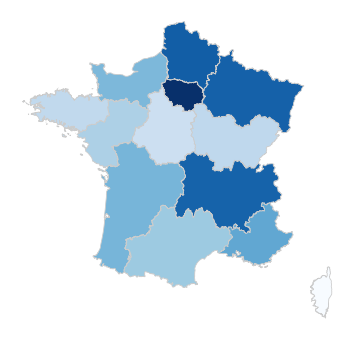

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

df_region = data_2021.groupby('libelle_region')['conso'].sum().reset_index()

france = gpd.read_file('https://github.com/gregoiredavid/france-geojson/raw/master/regions.geojson')

france_map = france.merge(df_region, left_on='nom', right_on='libelle_region')

fig, ax = plt.subplots(1, figsize=(10, 6))
france_map.plot(column='conso', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
plt.show()


<ipython-input-49-e123a41daadc>:16: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=row['nom'], xy=row['geometry'].centroid.coords[0], horizontalalignment='center')


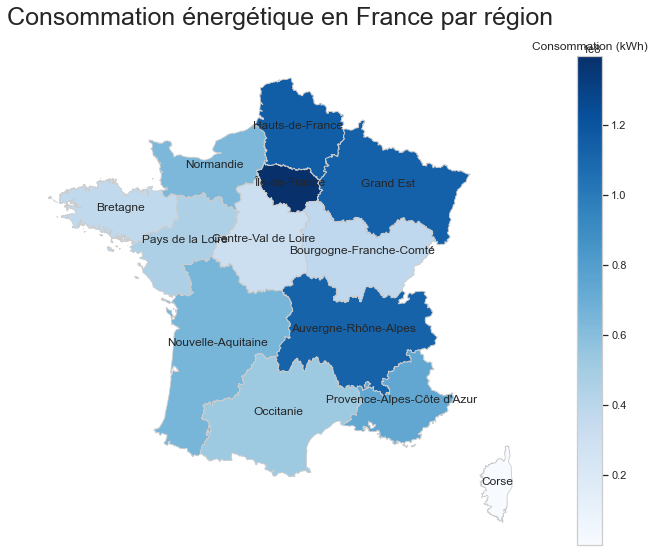

In [49]:
df_region = data_2021.groupby('libelle_region')['conso'].sum().reset_index()

france = gpd.read_file('https://github.com/gregoiredavid/france-geojson/raw/master/regions.geojson')

france_map = france.merge(df_region, left_on='nom', right_on='libelle_region')

fig, ax = plt.subplots(1, figsize=(15, 9))
france_map.plot(column='conso', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

for idx, row in france_map.iterrows():
    plt.annotate(s=row['nom'], xy=row['geometry'].centroid.coords[0], horizontalalignment='center')

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=df_region['conso'].min(), vmax=df_region['conso'].max()))
sm._A = []
cbar = fig.colorbar(sm)

ax.set_title('Consommation énergétique en France par région', fontdict={'fontsize': '25', 'fontweight' : '3'}, y=1.05)
cbar.ax.set_title('Consommation (kWh)')

ax.axis('off')
plt.show()


In [60]:
Q1 = data_2021['pdl'].quantile(0.25)
Q3 = data_2021['pdl'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data_2021[(data_2021['pdl'] < lower_bound) | (data_2021['pdl'] > upper_bound)]

print(outliers)

                                               operateur  annee      filiere  \
1                        Régie Municipale Bazas-Energies   2021  Electricité   
25     Régie municipale d'électricité de Salins les B...   2021  Electricité   
30            Régie municipale d'électricité de Saverdun   2021  Electricité   
31            Régie municipale d'électricité de Saverdun   2021  Electricité   
43            Régie municipale d'électricité de Varilhes   2021  Electricité   
...                                                  ...    ...          ...   
16818                                           Sorégies   2021          Gaz   
16820                                           Sorégies   2021          Gaz   
16822                                            Synelva   2021          Gaz   
16835                                         Veolia eau   2021          Gaz   
16851                                             Vialis   2021          Gaz   

      code_categorie_consommation libel

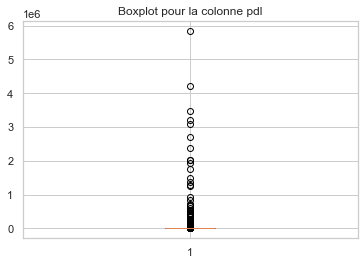

In [61]:
import matplotlib.pyplot as plt

plt.boxplot(data_2021['pdl'])
plt.title('Boxplot pour la colonne pdl')
plt.show()


In [63]:
sorted_values = data_2021['pdl'].sort_values(ascending=False)

top_10 = sorted_values[:10]

top_10

11794    5845680
4797     4210982
16222    3480433
7105     3196980
4826     3075763
11622    2693505
6294     2390387
4672     2037761
16673    2028197
7077     1922218
Name: pdl, dtype: int64